In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import talib

import data
import preprocess

warnings.simplefilter(action='ignore', category=FutureWarning)

# Read & Process

## Read equities & cryptocurrencies data

In [2]:
df_equity = data.read_excel_sheets()
df_equity['OpenTime'] = pd.to_datetime(df_equity['OpenTime'])
df_equity = df_equity.set_index('OpenTime') 

list_equity = df_equity.Symbol.unique().tolist()
print(f"\nEquity:\n{list_equity}")

crypto = 'data_crypto.xlsx'
df_crypto = (
    pd.read_excel(crypto)
    .drop(columns=['Unnamed: 0'])
)

df_crypto['OpenTime'] = pd.to_datetime(df_crypto['OpenTime'])
df_crypto = df_crypto.set_index('OpenTime') 

list_crypto = df_crypto.Symbol.unique().tolist()
print(f"\nCrypto:\n{list_crypto}")

AAPL
MSFT
NVDA
AMZN
META
GOOGL
BRK.B
GOOG
AVGO
TSLA
SPY_ETF
DAXEX_ETF
CAC40_ETF
NKY225_ETF
DJIA_ETF
EQQQ_ETF
FTSE_ETF

Equity:
['NKY225_ETF', 'AAPL', 'AMZN', 'AVGO', 'BRK.B', 'DJIA_ETF', 'GOOG', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SPY_ETF', 'TSLA', 'DAXEX_ETF', 'CAC40_ETF', 'EQQQ_ETF', 'FTSE_ETF']

Crypto:
['ADAUSDT', 'AVAXUSDT', 'BNBUSDT', 'BTCUSDT', 'DOGEUSDT', 'ETHUSDT', 'SOLUSDT', 'TRXUSDT', 'USDCUSDT', 'XRPUSDT']


# Sample Pairs

```
Pairs: META & BNBUSDT
Correlation: 0.787

Spread ADF Statistic: -3.3381
p-value: 0.013 (Spread is stationary)

Cointegration Test Statistic: -3.6076
p-value: 0.024 (Both series are cointegrated)
```

In [4]:
ticker_eqt = 'META'
ticker_cpy = 'BNBUSDT'

price_pairs = preprocess.process_pairs_series(ticker_eqt, ticker_cpy, df_equity, df_crypto, attr='Close')
price_pairs

,META,BNBUSDT
OpenTime,,
2024-10-14 12:30:00,593.140,590.50
2024-10-14 12:35:00,593.520,590.10
2024-10-14 12:40:00,594.720,589.30
2024-10-14 12:45:00,595.330,588.70
2024-10-14 12:50:00,596.440,588.30
...,...,...
2025-01-06 18:35:00,625.015,740.84
2025-01-06 18:40:00,627.060,740.39
2025-01-06 18:45:00,627.230,738.47


In [5]:
price_pairs_open = preprocess.process_pairs_series(ticker_eqt, ticker_cpy, df_equity, df_crypto, attr='Open')
price_pairs_open

,META,BNBUSDT
OpenTime,,
2024-10-14 12:30:00,594.220,589.20
2024-10-14 12:35:00,593.300,590.60
2024-10-14 12:40:00,593.760,590.10
2024-10-14 12:45:00,594.840,589.40
2024-10-14 12:50:00,595.480,588.60
...,...,...
2025-01-06 18:35:00,625.305,740.32
2025-01-06 18:40:00,625.060,740.85
2025-01-06 18:45:00,627.000,740.39


Pairs: META & BNBUSDT
Correlation: 0.787

Spread ADF Statistic: -3.3381
p-value: 0.013 (Spread is stationary)

Cointegration Test Statistic: -3.6076
p-value: 0.024 (Both series are cointegrated)


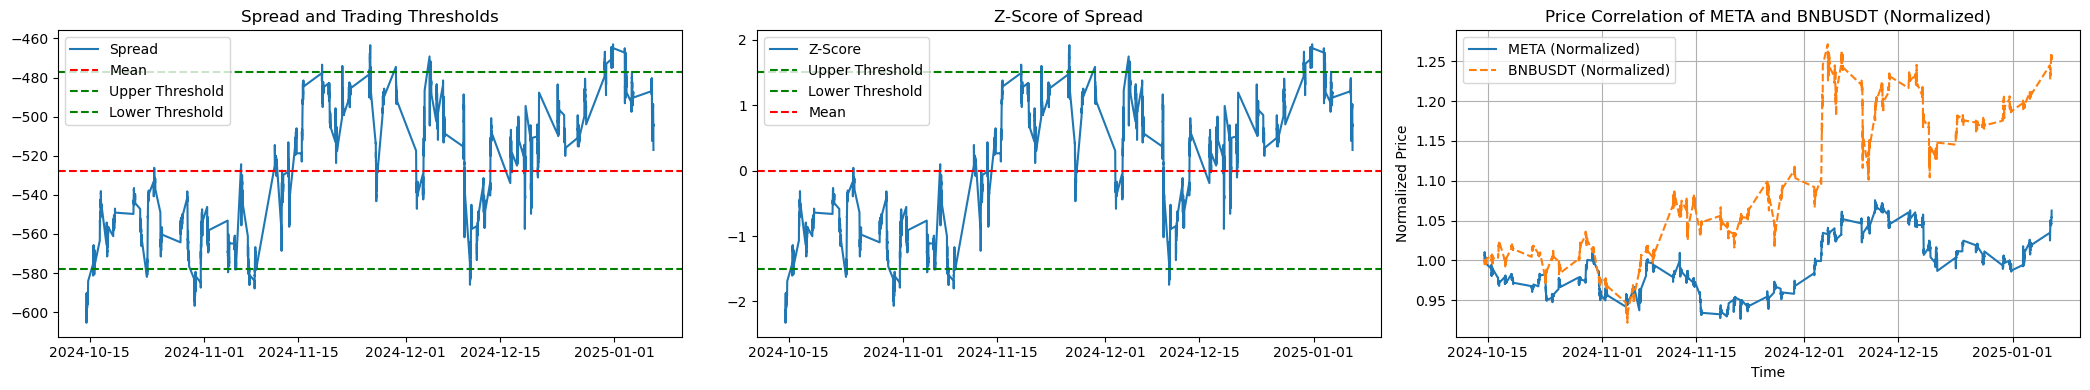

In [13]:
spread, correlation, adf_result, coint_result = preprocess.run_cointegration_test(price_pairs, print_stats=True, plotting=True, std=1.5)
price_pairs_open['spreadZscore'] = (spread - spread.mean()) / spread.std()

In [14]:
price_pairs_open

,META,BNBUSDT,spreadZscore
OpenTime,,,
2024-10-14 12:30:00,594.220,589.20,-1.884374
2024-10-14 12:35:00,593.300,590.60,-1.918927
2024-10-14 12:40:00,593.760,590.10,-2.014207
2024-10-14 12:45:00,594.840,589.40,-2.068416
2024-10-14 12:50:00,595.480,588.60,-2.146394
...,...,...,...
2025-01-06 18:35:00,625.305,740.32,0.710390
2025-01-06 18:40:00,625.060,740.85,0.575299
2025-01-06 18:45:00,627.000,740.39,0.507833


## Technial Analysis Library (TA-Lib)

In [21]:
output = talib.EMA(price_pairs_open['META'], timeperiod=5)
output

OpenTime
2024-10-14 12:30:00           NaN
2024-10-14 12:35:00           NaN
2024-10-14 12:40:00           NaN
2024-10-14 12:45:00           NaN
2024-10-14 12:50:00    594.320000
                          ...    
2025-01-06 18:35:00    624.481687
2025-01-06 18:40:00    624.674458
2025-01-06 18:45:00    625.449639
2025-01-06 18:50:00    626.088093
2025-01-06 18:55:00    627.288728
Length: 4456, dtype: float64

In [24]:
output = talib.MOM(price_pairs_open['META'], timeperiod=5)
output

OpenTime
2024-10-14 12:30:00       NaN
2024-10-14 12:35:00       NaN
2024-10-14 12:40:00       NaN
2024-10-14 12:45:00       NaN
2024-10-14 12:50:00       NaN
                        ...  
2025-01-06 18:35:00    1.8150
2025-01-06 18:40:00    1.3915
2025-01-06 18:45:00    3.4100
2025-01-06 18:50:00    2.7325
2025-01-06 18:55:00    4.7350
Length: 4456, dtype: float64

In [26]:
output.head(10)

OpenTime
2024-10-14 12:30:00      NaN
2024-10-14 12:35:00      NaN
2024-10-14 12:40:00      NaN
2024-10-14 12:45:00      NaN
2024-10-14 12:50:00      NaN
2024-10-14 12:55:00    2.240
2024-10-14 13:00:00    6.090
2024-10-14 13:05:00    5.500
2024-10-14 13:10:00    3.645
2024-10-14 13:15:00    1.945
dtype: float64